In [4]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch import optim

In [5]:
## Pytorch can be broken down into 3 part
# Dataset - dataset loader
# Set up Model module
# Traning loop & Evaluatioin 

In [6]:
import pandas as pd
print(torch.__version__)

2.4.0+cu118


In [7]:
import pandas as pd
data = pd.read_csv('mental_health_data.csv')

In [8]:
df = data.drop('Unnamed: 0', axis=1)
df = df.fillna("")

In [43]:
pd.set_option('display.max_colwidth', None)

df.sample(3)


,statement,status
47074,Lithium Acne Oh my god has anyone been on lithium and had it cause acne? I’ve been on it for about 6 months and the acne side effect is just evil. Which really sucks bc it’s been working really well for me. Does anyone have any acne (severe cystic acne) tips?,Bipolar
52389,"Is tingling in fingers/hand normal? I've experienced many physical symptoms of anxiety, but I recently began experiencing constant tingling on the tips of my fingers and my palm, mostly on one hand. These sensations have been occurring for around two weeks and I'm stressing about something serious going on with my health. Has anyone else experienced anything similar?",Anxiety
38173,i just want to stop being so sad i feel like i m failing at life i m sitting at my desk and i just can t stop fucking cry over literally nothing i just don t see any hope for my future somehow i always come back to this feeling i used to fantasize about getting hurt enough to be in a hospital for like week just to get a break but not actually kill myself because i feel like i couldn t do that to the people around me i really have no one in my life to talk to right now i tried the crisis text line and my god they are unhelpful you are so brave for reaching out how do you think you were able to reach out tonight um maybe because i have this option or the option to off myself and one seems a little more rational than the other how do you guy cope when you just can t do it anymore,Depression


In [9]:
texts = df['statement']
labels = df['status']  # Replace with your actual labels

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

# Sample dataset

texts = df['statement']
labels = df['status']  # Replace with your actual labels

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2)) 
X = vectorizer.fit_transform(texts).toarray()

# Convert labels to numeric form
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)


In [18]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x


In [21]:
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        scheduler.step()
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Model parameters
input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(set(y))

# Initialize the model, loss function, and optimizer
model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)


# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=10)


Epoch [1/10], Loss: 0.7834
Epoch [2/10], Loss: 1.2293
Epoch [3/10], Loss: 0.3572
Epoch [4/10], Loss: 0.5891
Epoch [5/10], Loss: 0.4449
Epoch [6/10], Loss: 0.0192
Epoch [7/10], Loss: 0.1454
Epoch [8/10], Loss: 0.3295
Epoch [9/10], Loss: 0.0712
Epoch [10/10], Loss: 0.1951


Train Accuracy: 94.82%
Train Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.97      0.96      0.97      3109
             Bipolar       0.98      0.95      0.97      2297
          Depression       0.95      0.91      0.93     12304
              Normal       0.96      0.99      0.98     13024
Personality disorder       1.00      0.86      0.93       953
              Stress       0.98      0.92      0.95      2112
            Suicidal       0.90      0.94      0.92      8635

            accuracy                           0.95     42434
           macro avg       0.96      0.94      0.95     42434
        weighted avg       0.95      0.95      0.95     42434



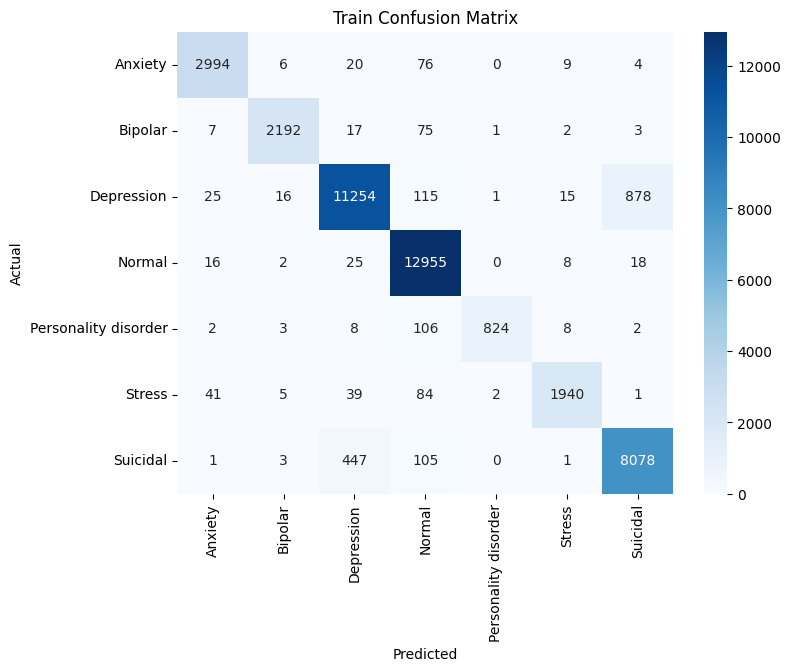

Test Accuracy: 77.65%
Test Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.79      0.80      0.79       779
             Bipolar       0.81      0.74      0.77       580
          Depression       0.74      0.71      0.73      3100
              Normal       0.88      0.95      0.91      3327
Personality disorder       0.80      0.54      0.64       248
              Stress       0.67      0.55      0.60       557
            Suicidal       0.66      0.69      0.68      2018

            accuracy                           0.78     10609
           macro avg       0.76      0.71      0.73     10609
        weighted avg       0.77      0.78      0.77     10609



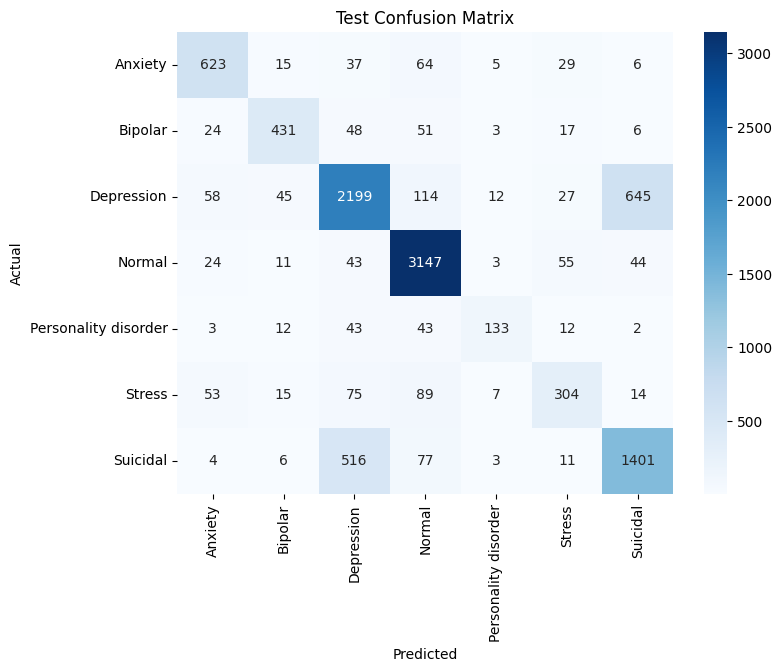

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader, data_type="Test"):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            
            all_preds.extend(predicted.numpy())
            all_labels.extend(y_batch.numpy())

    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"{data_type} Accuracy: {accuracy * 100:.2f}%")
    
    # Print classification report
    print(f"{data_type} Classification Report:\n", classification_report(all_labels, all_preds, target_names=label_encoder.classes_))
    
    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{data_type} Confusion Matrix")
    plt.show()

# Evaluate on training data
evaluate_model(model, train_loader, data_type="Train")

# Evaluate on test data
evaluate_model(model, test_loader, data_type="Test")



In [30]:
# Example input text
input_text = "I have never been more worried"

# Step 1: Preprocess the text using the trained vectorizer
input_vector = vectorizer.transform([input_text]).toarray()

# Step 2: Convert to PyTorch tensor
input_tensor = torch.tensor(input_vector, dtype=torch.float32)

# Step 3: Set the model to evaluation mode and make a prediction
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    _, predicted_label_index = torch.max(output, 1)

# Convert the numeric label back to the original label using LabelEncoder
predicted_label = label_encoder.inverse_transform(predicted_label_index.numpy())[0]

print(f"The predicted label for the input text is: {predicted_label}")


The predicted label for the input text is: Anxiety
